
AB笼因为其独特的几何结构而被人们广泛研究，本代码基于一维金刚石链研究逆安德森相变，计算其在周期性边界条件下的能谱、逆参与比、传输图和含时演变图。
参考文献：
\begin{equation}
Longhi S. Inverse Anderson transition in photonic cages[J]. Optics Letters, 2021, 46(12): 2872-2875.
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from matplotlib import rcParams
from scipy.linalg import expm
from tyx import Hamin_H,evo_with_site,compute_IPR,compute_energy

config = {
    "font.family":'serif',
    "font.size": 20,
    'axes.labelsize' : 20,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
    'axes.unicode_minus':False}
rcParams.update(config)

在AB笼中引入伯努利无序后，能谱方程和跃迁方程得到化简，可以得到此刻能带的解析解
\begin{equation}
E^{3}-( \mathcal{V}^{2}+4 \kappa^{2} ) E+4 \kappa^{2} \mathcal{V} \operatorname{c o s} q=0. 
\end{equation}
这可以确定色散关系，得到3条布洛赫能带

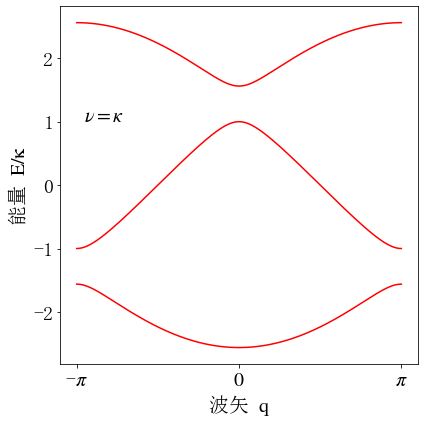

In [2]:
from sympy import symbols,solve,re
import matplotlib.pyplot as plt
q = [-3.14+0.01*k for k in range(629)]
nu = 1
kapa = 1
sol = [[],[],[]]
for i in q:
    E = symbols('E')
    equation = E*E*E-(nu*nu+4*kapa*kapa)*E+4*kapa*kapa*nu*np.cos(i)
    solution = solve(equation, E)

    for j in range(3):
        sol[j].append(re(solution[j]))

fig, ax = plt.subplots(figsize=(6,6))
for i in range(3):
    ax.plot(q,sol[i],"r")
plt.xlabel(r"波矢 $\mathrm{q}$")
plt.ylabel(r"能量 $\mathrm{E/κ}$")
plt.xticks([-3.14,0,3.14],["-$\pi$","$0$","$\pi$"],fontsize = 20)
plt.yticks(fontsize = 20)
plt.text(-3,1,r"$ν=κ$",fontsize = 20)
fig.tight_layout()
plt.show()   

由(1)式可以得出，能带总带宽会随着无序变化

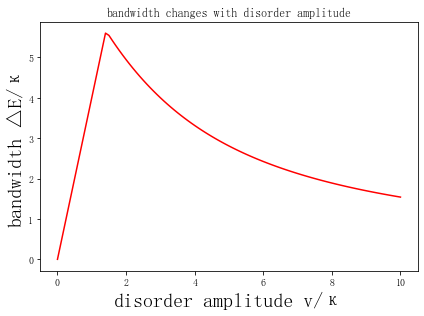

In [3]:
from sympy import symbols,solve,re
import numpy as np
import matplotlib.pyplot as plt
from sympy import S
kapa = 1
nu = [0+0.1*k for k in range(101)]
sol = [[],[],[]]
sum_width = []
q = [-3.14+0.01*k for k in range(629)]
for k in nu: 
    for i in q:
        E = symbols('E')
        equation = E*E*E-(k*k+4*kapa*kapa)*E+4*kapa*kapa*k*np.cos(i)
        solution = solve(equation, E)

        for j in range(3):
            sol[j].append(re(solution[j]))
    w = (max(sol[0])-min(sol[0]))+(max(sol[1])-min(sol[1]))+(max(sol[2])-min(sol[2]))
    sol = [[],[],[]]
    sum_width.append(w)

nu = [0+0.1*k for k in range(101)]
fig, ax = plt.subplots(figsize=(6,4.5))
ax.plot(nu,sum_width,"r")
plt.ylabel("bandwidth △E/κ")
plt.xlabel("disorder amplitude v/κ")
plt.title("bandwidth changes with disorder amplitude")
fig.tight_layout()
plt.show()   #代码需要运行30min

求解哈密顿矩阵的本征值和本征函数
\begin{matrix}
0 &-\kappa&\kappa & \ldots & 0 & \kappa & \kappa\\
-\kappa & V_1 & 0 & \ldots & 0 & 0 & 0\\
\kappa & 0 & W_1 & \ldots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \ldots & 0 & -\kappa & \kappa\\
\kappa & 0 & 0 & \ldots & -\kappa & V_n & 0\\
\kappa & 0 & 0 & \ldots & \kappa & 0 & W_n\\
\end{matrix}


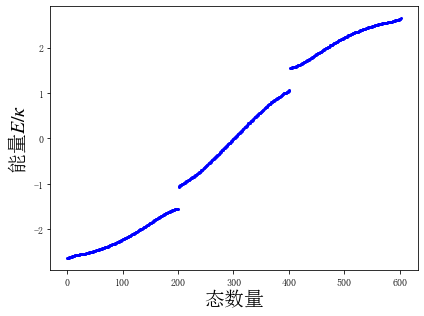

In [4]:
N = 201#计算对称无序下的能谱
n = [k for k in range(3*N)]
uni_lis = random.uniform(-1,1,(1,N))
disorder = []
flag = 0
kapa = 1
for i in range(3*N):
    if (i%3) == 0:
        disorder.append(0)
    elif ((i-1)%3) == 0:
        if uni_lis[0][flag]>0:
            disorder.append(uni_lis[0][flag]*0.5+0.75)
            flag += 1
        else:
            disorder.append(uni_lis[0][flag]*0.5-0.75)
            flag += 1  
    else:
        disorder.append(-disorder[i-1])  #计算对称无序把符号去了即可
H = np.zeros((3*N,3*N))
for i in range(N):
    H[3*i,3*i+1] = -kapa
    H[3*i,3*i+2] = kapa
    H[3*i+1,3*i] = -kapa
    H[3*i+2,3*i] = kapa
    H[3*i-1,3*i] = kapa
    H[3*i-2,3*i] = kapa
    H[3*i,3*i-1] = kapa
    H[3*i,3*i-2] = kapa
    
np.fill_diagonal(H, disorder) 
energies = np.linalg.eigvalsh(H)
e,v = np.linalg.eigh(H)
fig, ax = plt.subplots(figsize=(6,4.5))
ax.plot(n,energies,"bo",markersize=2)
plt.xlabel("态数量")
plt.ylabel("能量$E/κ$")
fig.tight_layout()
plt.show()

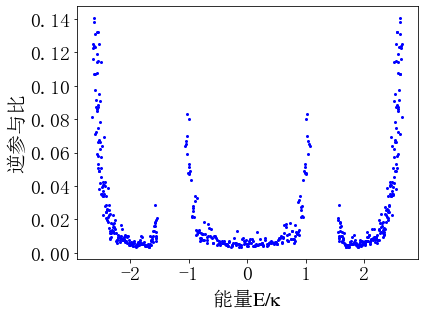

In [5]:
e,vector = np.linalg.eig(H)  ##计算对称无序下的逆参与比
IPR = []
for i in range(3*N):
    IPR.append(sum(vector[:,i]*vector[:,i]*vector[:,i]*vector[:,i]))
# np.save("数据/antisym_WV.npy",IPR)
fig, ax = plt.subplots(figsize=(6,4.5))
ax.plot(e,IPR,"bo",markersize=2)
plt.xlabel("能量$\mathrm{E/κ}$")
plt.ylabel("逆参与比")

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.vlines(1,-3,3,color="grey",linestyle="-.",linewidth=0.5)
fig.tight_layout()
plt.show()


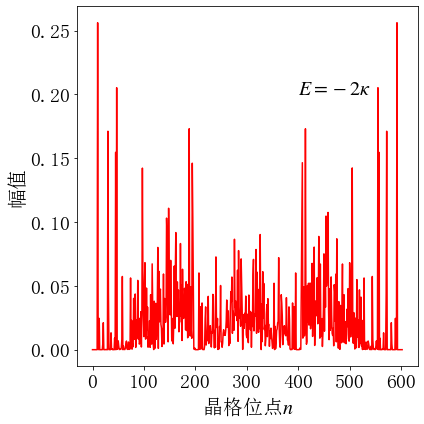

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(n,abs(v[:][180]),"r")
plt.xlabel("晶格位点$n$")
plt.ylabel("幅值")

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.vlines(1,-3,3,color="grey",linestyle="-.",linewidth=0.5)
plt.text(400,0.2,r"$E=-2κ$",fontsize = 20)
fig.tight_layout()
plt.show()

在$\nu = \kappa$，$\Delta = 0.5\nu$时，计算此刻普通分布下的偏差图和演变图。

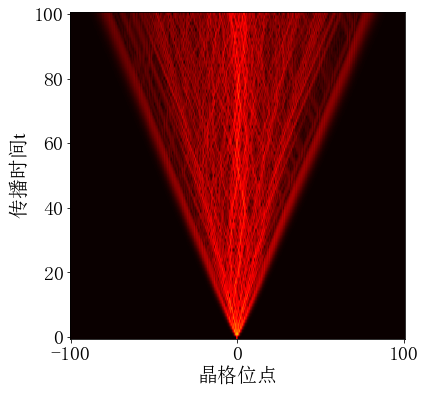

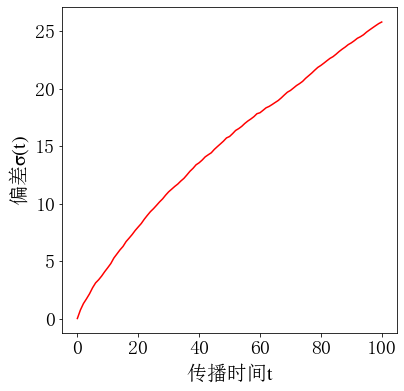

In [3]:
N = 201
H = Hamin_H(N,0.5,1,np.pi) 
sigma_z = [0]
n = []
for i in range(-100,101):
    n += [i,i,i]
n = np.array(n)
t_total = 100
propa_κz = [m for m in range(0,t_total+1)]
initial_v = np.zeros((3*N,1)) #列向量
initial_v[300] = 1
evo_201,sigma_z = evo_with_site(H,initial_v,t_total)

plt.figure(figsize=(6, 6))
plt.imshow(np.sqrt(evo_201),cmap="hot",origin="lower",aspect="auto")  #origin可以改变从下到上排列，则无需翻转evo_201
plt.xticks(np.arange(0,601,300),np.arange(-100,200,100))
plt.xlabel("晶格位点",fontsize = 20)
plt.ylabel("传播时间$\mathrm{t}$",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# cmap=plt.cm.jet, norm=LogNorm(vmin=0.01, vmax=1)
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(propa_κz,sigma_z,"r",markersize=3)
plt.xlabel("传播时间$\mathrm{t}$")
plt.ylabel("偏差$\mathrm{\sigma(t)}$")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

在确认反对称无序可以实现粒子的输运后，可以计算不同分布下的情况。下面画出了$\Delta=0、0.5、1、2\nu$时粒子的传输图和演变图。

In [ ]:
kapa_list = [0,0.5,1,2]
dot_color = ["ro","bo","go","mo"]
evo_name = ["evo_bernoulli.npy","evo_kapa_1_2.npy",
            "evo_kapa_1.npy","evo_kapa_2.npy"]
sigma_z_name = ["sigma_z_del_0_rat_1_ave_50.npy","sigma_z_del_0_5_rat_1_ave_50.npy"
                ,"sigma_z_del_1_rat_1_ave_50.npy","sigma_z_del_2_rat_1_ave_50.npy"]
aver = 50
evo_list = []
N = 201
initial_v = np.zeros((3*N,1)) #列向量
initial_v[300] = 1

fig, ax = plt.subplots(figsize=(3,5))

for i in range(4):
    ave_sigma_z = np.zeros((1,101))[0]
    for j in range(aver):
        H = Hamin_H(201,kapa_list[i],1.0)
        evo_201,sigma_z = evo_with_site(H,initial_v,100)
        ave_sigma_z = ave_sigma_z + np.array(sigma_z)
    ave_sigma_z = ave_sigma_z/aver
    np.save("数据/"+sigma_z_name[i],ave_sigma_z)
    propa_κz = [m for m in range(0,101)]
    ax.plot(propa_κz,ave_sigma_z,dot_color[i],markersize=2)

plt.xlabel("propagation distance κz")
plt.ylim(0,45)
plt.ylabel("$\sigma(z)$")
plt.text(75,37,"1")
plt.text(80,27,"2")
plt.text(90,16,"3")
plt.text(85,5,"4")
fig.tight_layout()
plt.show() #代码需要运行120分钟

0.9999923934668556
0.9939970356814061
0.9587661917941247
0.7926019487922348


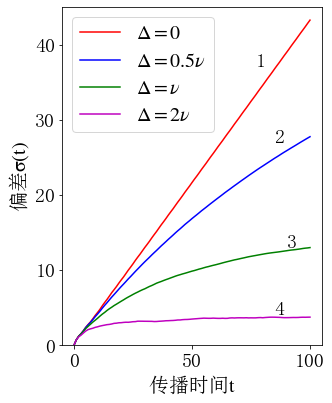

In [ ]:
label_name = ["0","0.5ν","ν","2ν"]
dot_color = ["r","b","g","m"]
marker = ["o","v","s","*"]
fig, ax = plt.subplots(figsize=(5,6))
propa_κz = [m for m in range(0,101)]

for i in range(len(sigma_z_name)):
    a = np.load("数据/"+sigma_z_name[i])
    x = np.array(propa_κz).reshape(1, -1)
    y = a.reshape(1, -1)
    print(np.corrcoef(np.r_[x,y])[0,1])  
    ax.plot(propa_κz,a,dot_color[i],markersize=2,label = "$\Delta = {}$".format(label_name[i]))
plt.legend()
plt.xlabel("传播时间$\mathrm{t}$")
plt.ylim(0,45)
plt.ylabel("偏差$\mathrm{\sigma(t)}$")
plt.text(77,37,"1")
plt.text(85,27,"2")
plt.text(90,13,"3")
plt.text(85,4,"4")
fig.tight_layout()
plt.show() 

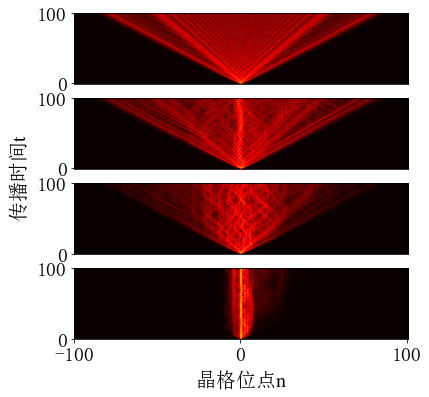

In [ ]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(6,6))
for i in range(4):
    evo = np.load("数据/"+evo_name[i])
    plt.subplot(4,1,i+1)
    plt.imshow(np.sqrt(evo),cmap='hot',origin="lower",aspect="auto")
    plt.xticks([])
    plt.xticks(fontsize = 20)
    plt.yticks([0,100],[0,100],fontsize = 20)
plt.xticks(np.arange(0,601,300),np.arange(-100,200,100))
plt.text(-120, 230, r'传播时间$\mathrm{t}$',rotation=90,verticalalignment="center",fontsize=20)
plt.xlabel("晶格位点$\mathrm{n}$",fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()
    


在确认了伯努利无序下粒子具有最快的输运速度，可以画出$\Delta = 0$时，$\nu = 0.5、1、\sqrt{2}、4、10\kappa$时的传输图。

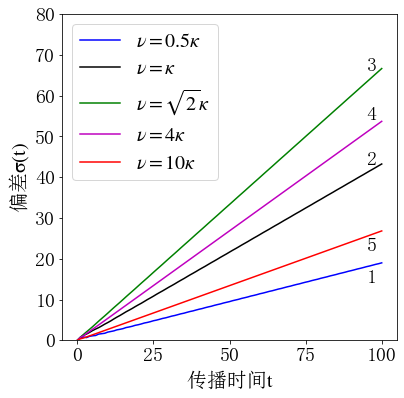

In [ ]:
rat_list = [0.5,1,np.sqrt(2),4,10]
color_lis = ["b","k","g","m","r"]
fig, ax = plt.subplots(figsize=(6,6))
propa_κz = [m for m in range(0,101)]
N = 201
initial_v = np.zeros((3*N,1)) #列向量
initial_v[300] = 1

# for i in range(len(rat_list)):  #直接计算，代码需要运行2分钟
#     H = Hamin_H(201,0,rat_list[i])
#     evo,sigma_z = evo_with_site(H,initial_v,100)
#     np.save("数据/sigma_del0_rat{}".format(rat_list[i]),sigma_z)
#     ax.plot(propa_κz,sigma_z,color_lis[i],markersize=2.5)

#利用储存数据画图
list1 = ["sigma_del0_rat0.5","sigma_del0_rat1","sigma_del0_rat1_42","sigma_del0_rat4","sigma_del0_rat10"]
label_name = ["0.5\kappa","\kappa","\sqrt{2}\kappa","4\kappa","10\kappa"]
for i in range(len(list1)):
    sigam_z = np.load("数据/{}.npy".format(list1[i]))
    ax.plot(propa_κz,sigam_z,color_lis[i],markersize=2.5,label = "$ν={}$".format(label_name[i]))
plt.legend()
plt.xlabel("传播时间$\mathrm{t}$")
plt.text(95,66,"3")
plt.text(95,54,"4")
plt.text(95,43,"2")
plt.text(95,22,"5")
plt.text(95,14,"1")
plt.ylim(0,80)
plt.ylabel("偏差$\mathrm{\sigma(t)}$")
plt.show() 

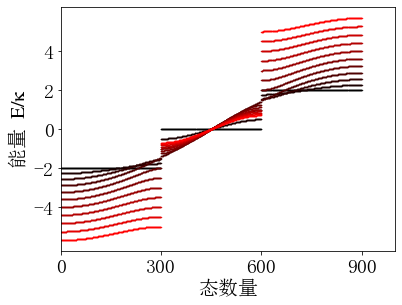

In [ ]:
#伯努利分布下，随着V的增加能带分布
V_list = [i/2 for i in range(0,11) ]

n = [i for i in range(900)]
plt.figure(figsize=(6, 4.5))
for i in range(len(V_list)):
    H = Hamin_H(300,0,V_list[i])
    energy = compute_energy(H)
    plt.plot(n,energy,'o',color = (V_list[i]*0.2,0,0),markersize =0.5)
plt.xlim(0,1000)
plt.xlabel(r"态数量")
plt.ylabel(r"能量 $\mathrm{E/κ}$")
plt.yticks(np.arange(-4,6,2),np.arange(-4,6,2))
plt.xticks(np.arange(0,1000,300),fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


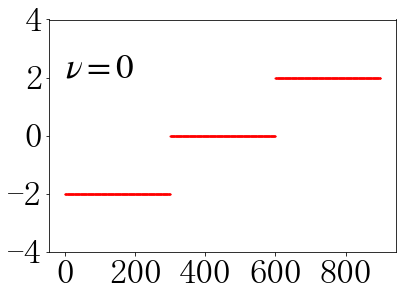

In [ ]:
from PIL import Image
N = 300
H = Hamin_H(N,0,0)
energy = compute_energy(H)
n = [i for i in range(3*N)]
fig, ax = plt.subplots(figsize=(6,4.5))
ax.plot(n,energy,"ro",markersize=1)

plt.yticks(np.arange(-4,6,2),np.arange(-4,6,2),fontsize = 35)
plt.xticks(fontsize = 35)
plt.text(0,2,r'$ν=0$',fontsize = 35)  #$\sqrt{2}$ κ
#plt.vlines(1,-3,3,color="grey",linestyle="-.",linewidth=0.5)
fig.tight_layout()
plt.show()